## Housing Prices Competition

<a href="https://www.kaggle.com/competitions/home-data-for-ml-course/overview">Kaggle Link</a>

#### Imports

In [64]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder

### Dataset Info

In [65]:
df_original = pd.read_csv("Data/train.csv")
df = df_original

df.drop(columns=["Id"], inplace=True, axis=1)

print(f"Number of observation: {df.shape[0]}")

df.head()

Number of observation: 1460


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
# for column in df.columns:
#     # print(column, "---->", df[column].nunique())
#     if df[column].dtypes == "O":
#         print(column, "---->", df[column].nunique())
    

def grab_col_names(dataframe, cat_th=26, car_th=100):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
print('\n'.join(num_cols))

LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice


In [67]:
# rows = df[df["GarageCars"].isnull()]
# print(rows[["GarageCars", "GarageType", "GarageFinish", "GarageYrBlt", "GarageArea", "GarageQual", "GarageCond"]])

# rows = df[df["BsmtQual"].isnull()]
# print(rows[["BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"]])

rows = df[df["MasVnrType"].isnull()]
print(rows[["MasVnrType","MasVnrArea"]])

     MasVnrType  MasVnrArea
1           NaN         0.0
3           NaN         0.0
5           NaN         0.0
8           NaN         0.0
9           NaN         0.0
...         ...         ...
1454        NaN         0.0
1455        NaN         0.0
1457        NaN         0.0
1458        NaN         0.0
1459        NaN         0.0

[872 rows x 2 columns]


### Correlation Analysis

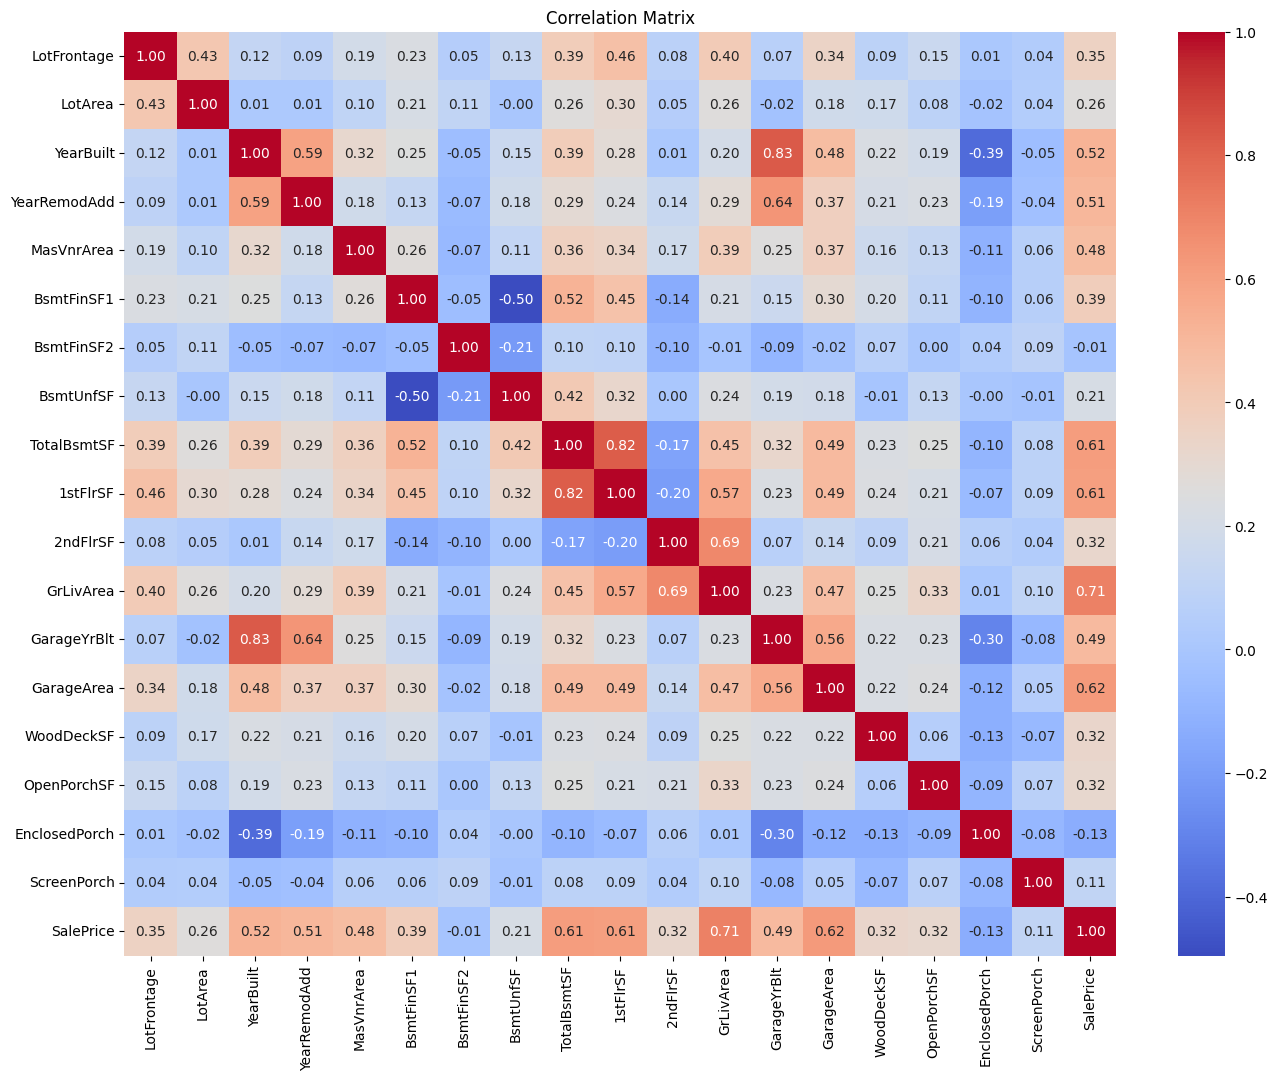

In [68]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Missing Value Analysis

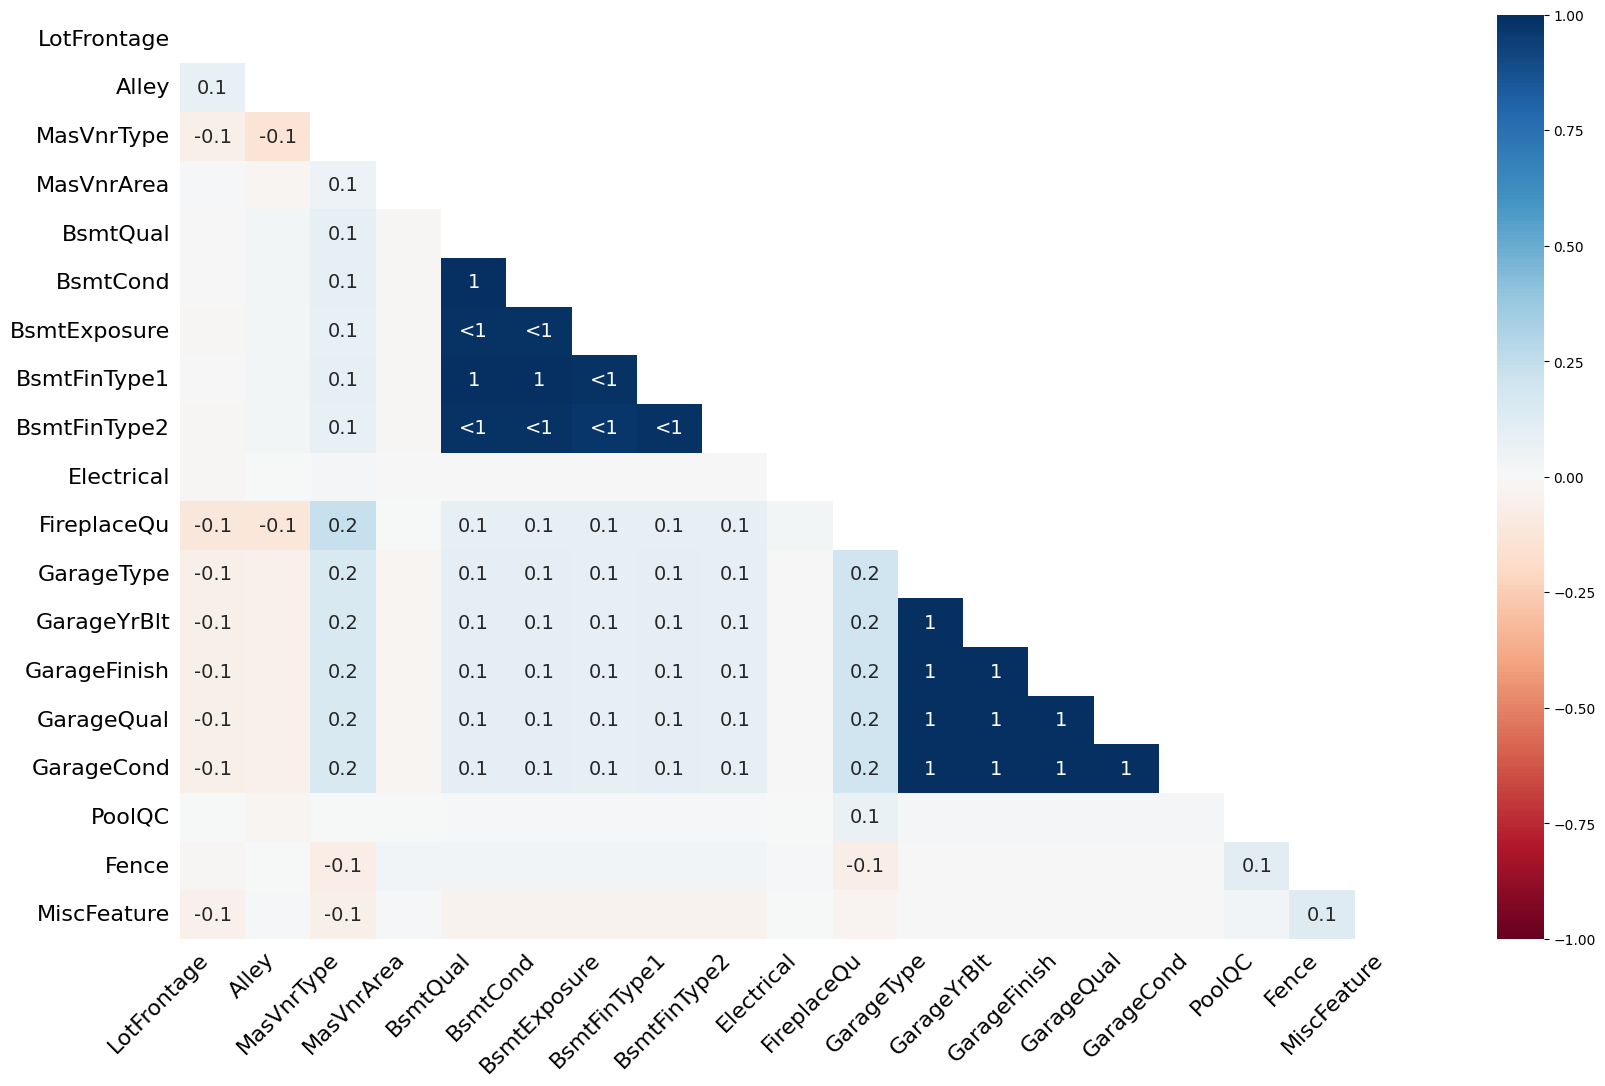

In [34]:
# msno.bar(df)
# plt.show()

# msno.matrix(df)
# plt.show()

msno.heatmap(df)
plt.show()

In [70]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = encoder.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols))
df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=cat_cols, inplace=True)

df.head()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [51]:
df["YearRemodAdd"].describe().T

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [ ]:
f[num_cols].corr()lof = LocalOutlierFactor(n_neighbors=20)
lof.fit_predict(df[num_cols])

lof_scores = lof.negative_outlier_factor_
np.sort(lof_scores)

scores = pd.DataFrame(np.sort(lof_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [ ]:
plt.scatter(df["GarageYrBlt"], df["SalePrice"])
plt.xlabel("GarageYrBlt")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
correlation = df_outliers.corr()

### Outlier Analysis